# Import các thư viện cần thiết

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [73]:
df = pd.read_csv("Data/BA_Reviews_processed.csv")

## Biểu đồ x

+ Tiêu đề: Tổng điểm đánh giá qua từng năm.
+ Loại biểu đồ: Line chart
+ Lý do chọn : Line chart là một cách hiệu quả để thể hiện các xu hướng tăng giảm hoặc sự biến động của dữ liệu qua thời gian. Do đó ta dùng line chart để xem xét sự thay đổi điểm đánh giá chuyến bay qua từng năm.

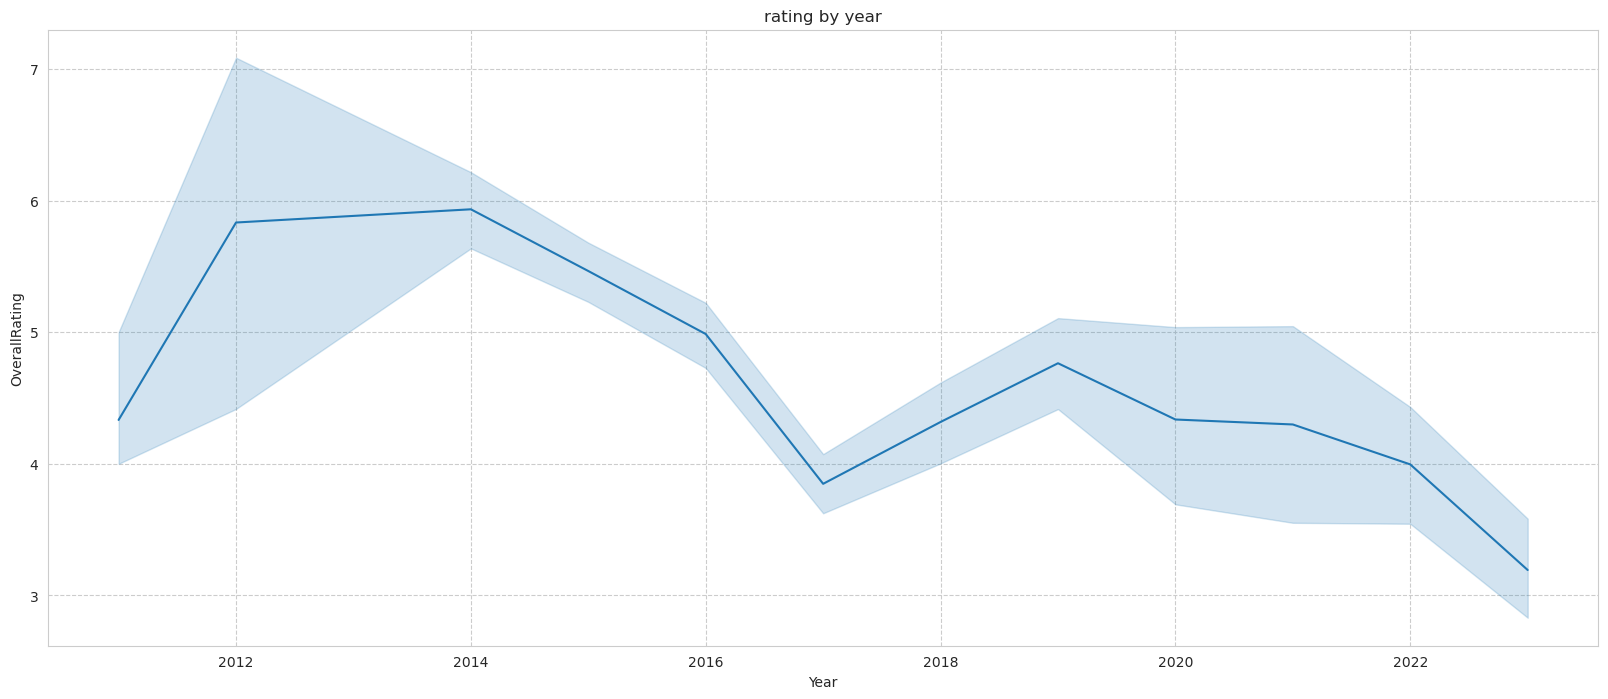

In [74]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Year']=(df['Datetime']).dt.year
plt.subplots(figsize=(20,8))
sns.lineplot(x='Year', y='OverallRating', data=df).set_title('rating by year')
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.show();

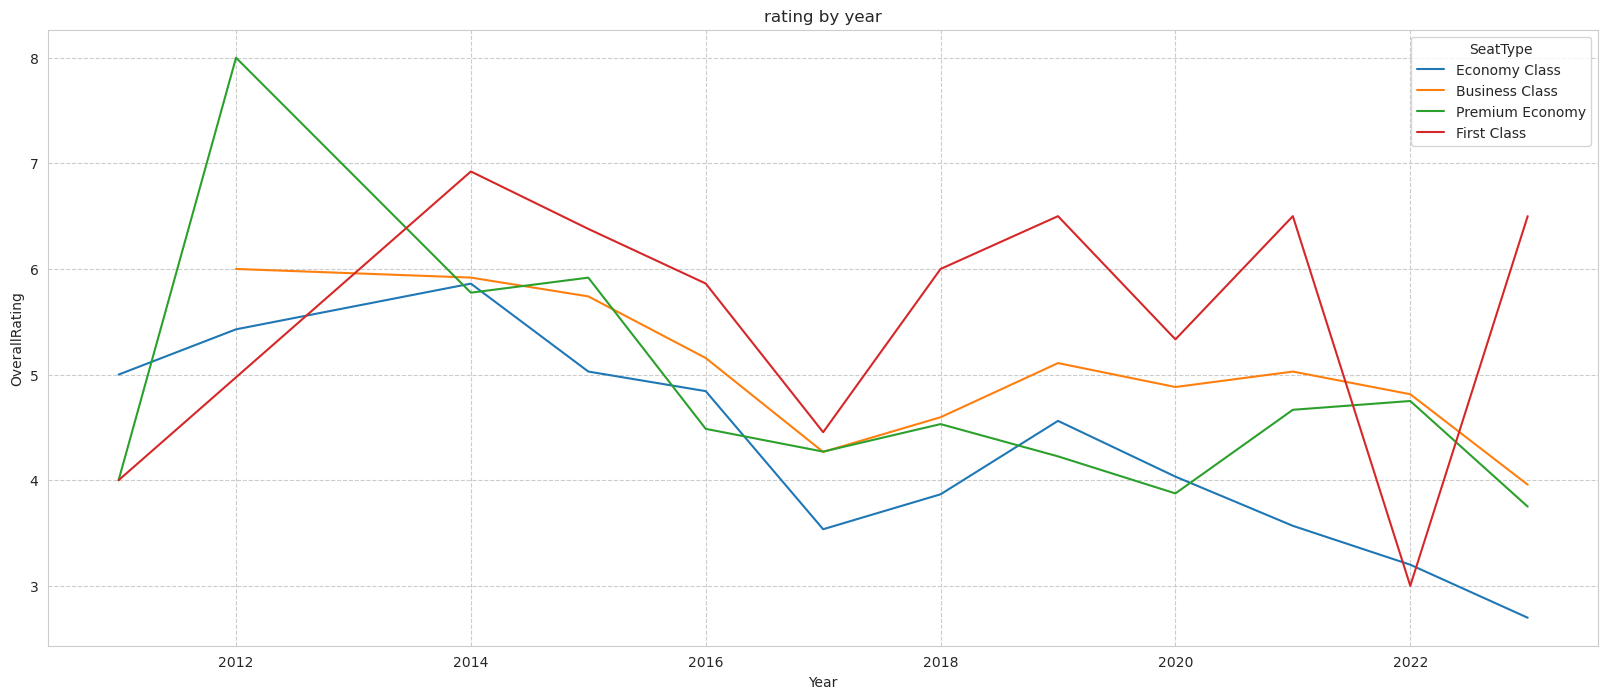

In [75]:
plt.subplots(figsize=(20,8))
sns.lineplot(x='Year', y='OverallRating', data=df, hue='SeatType', errorbar=None).set_title('rating by year')
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.show();

## Biểu đồ x

+ Tiêu đề: Tiêu chí nào ảnh hưởng đến Overall Rating nhiều nhất
+ Loại biểu đồ: Bar chart


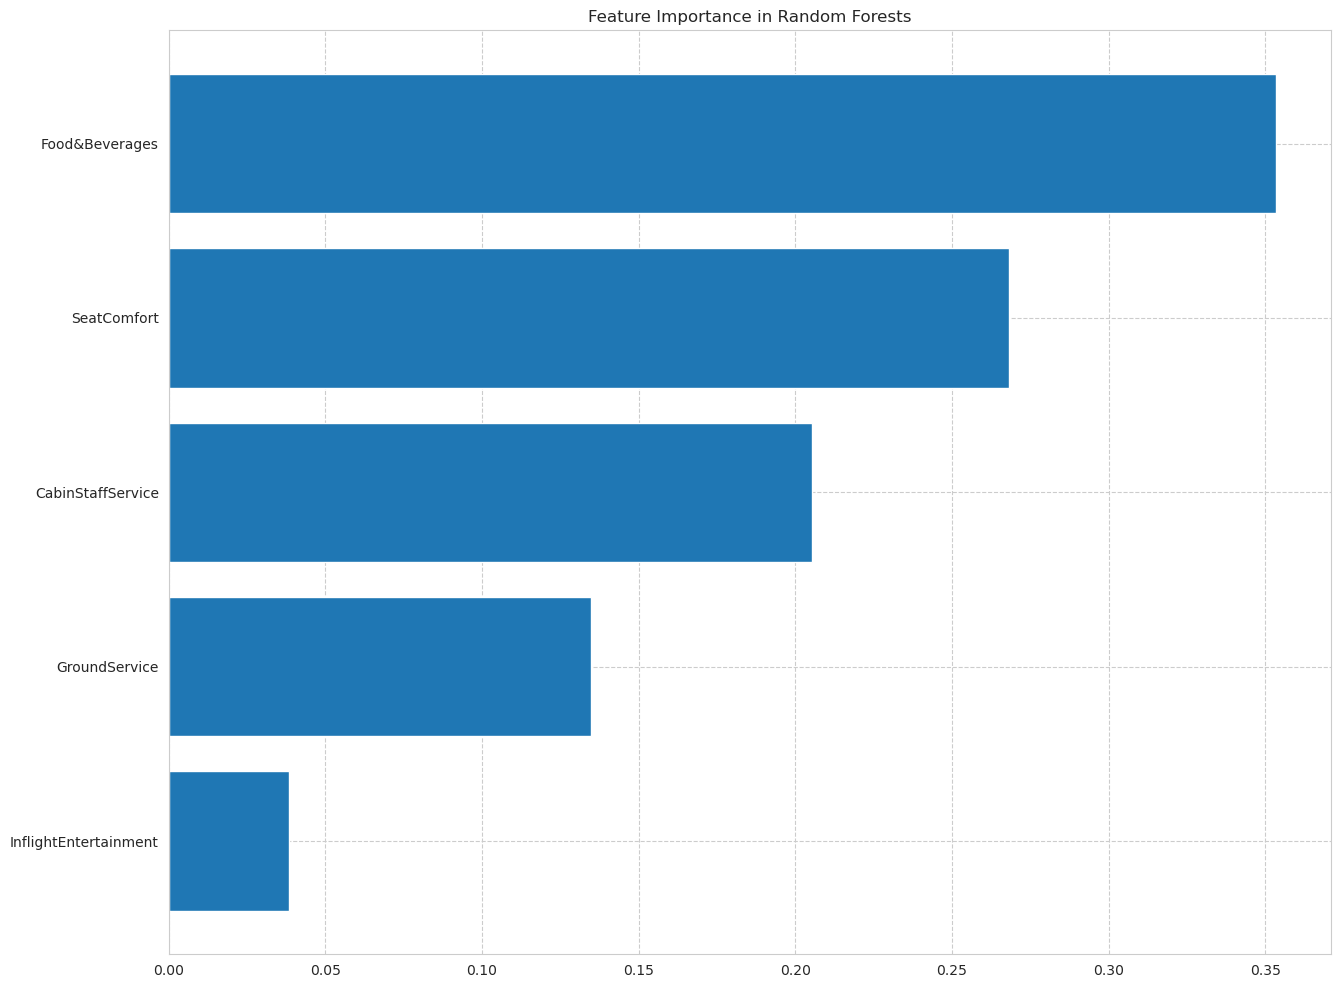

In [76]:
from sklearn.ensemble import RandomForestRegressor

X = df[['SeatComfort', 'CabinStaffService', 'GroundService', 'Food&Beverages', 'InflightEntertainment']]
y = df[['OverallRating']]

model = RandomForestRegressor()
model.fit(X, y)

f, ax=plt.subplots(figsize=(15,12))
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax)
ax.set_title('Feature Importance in Random Forests');

## Biểu đồ x:

Try using dimensionality reduction...

In [77]:
X_tsne = df[['SeatComfort', 'CabinStaffService', 'GroundService', 'Food&Beverages', 'InflightEntertainment', 'OverallRating']]
X_tsne = X_tsne.fillna(X_tsne.median())
print(X_tsne)

      SeatComfort  CabinStaffService  GroundService  Food&Beverages  \
0             1.0                1.0            1.0             3.0   
1             2.0                3.0            1.0             1.0   
2             3.0                3.0            4.0             4.0   
3             3.0                3.0            1.0             3.0   
4             1.0                1.0            1.0             1.0   
...           ...                ...            ...             ...   
3696          3.0                1.0            3.0             2.0   
3697          4.0                5.0            3.0             4.0   
3698          3.0                3.0            3.0             3.0   
3699          1.0                3.0            3.0             5.0   
3700          4.0                5.0            3.0             5.0   

      InflightEntertainment  OverallRating  
0                       3.0            1.0  
1                       2.0            3.0  
2           

In [78]:
X_tsne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3701 entries, 0 to 3700
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SeatComfort            3701 non-null   float64
 1   CabinStaffService      3701 non-null   float64
 2   GroundService          3701 non-null   float64
 3   Food&Beverages         3701 non-null   float64
 4   InflightEntertainment  3701 non-null   float64
 5   OverallRating          3701 non-null   float64
dtypes: float64(6)
memory usage: 173.6 KB


In [90]:
from sklearn.manifold import TSNE
import plotly.express as px

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_tsne)
tsne.kl_divergence_

0.39627960324287415

In [91]:
print(X_tsne)

[[-44.742146    56.79949   ]
 [-29.463682     6.2733617 ]
 [ 39.536232    -4.6645947 ]
 ...
 [  1.2728033  -11.849161  ]
 [  0.55633485   5.862317  ]
 [  8.986045    38.875057  ]]


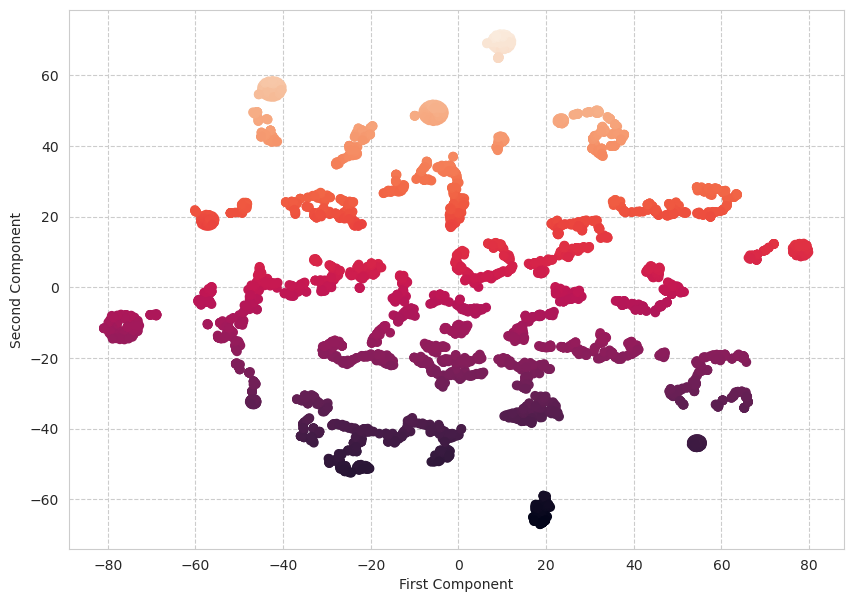

In [92]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(X_tsne[:,0], X_tsne[:,1], c=X_tsne[:,1])
ax.set(xlabel='First Component',
       ylabel='Second Component');